## Normalization

#### Normalization is a feature scaling technique used in Machine Learning to rescale numerical features to a fixed range, most commonly [0, 1].

its a technique often appplied as part od data preparation for machine learning , the goal of normalization
is to change the values of numeric columns in the dataset to use a common scale , without distorting difference
in the range of values or losing information 

---

### Formula (Min–Max Scaling)
x' = (x − xmin) / (xmax − xmin)

Where:
- x = original value  
- xmin = minimum value of the feature  
- xmax = maximum value of the feature  

---

### Key Properties
- Scales data to a fixed range (usually 0 to 1)
- Preserves the relative order of values
- Does not change the shape of the distribution
- Does not center data around zero

---

### Advantages
- Makes features comparable
- Useful when a bounded range is required
- Simple and easy to interpret
- Works well with distance-based models

---

### Limitations
- Highly sensitive to outliers
- Extreme values can compress most data points
- Not suitable when data contains strong outliers

---

### When to Use Normalization
- K-Nearest Neighbors (KNN)
- K-Means Clustering
- Image data (pixel values)
- Neural networks (in some cases)
- When model expects inputs in a fixed range

---

### When Not to Use Normalization
- Tree-based models (Decision Tree, Random Forest)
- When data contains strong outliers (prefer RobustScaler)

---

### Normalization vs Standardization
- Normalization scales data to a fixed range
- Standardization scales data to mean 0 and standard deviation 1

---

# Types of Normalization 

1) Min Max Scaling 
2) Mean Normalization 
3) Max Absolute Scaling 
4) Robust Scaling  etc.

### MinMaxScaling 

# Min-Max Scaling (Normalization)

## What is Min-Max Scaling?
Min-Max Scaling is a normalization technique used to rescale numerical features into a fixed range, usually **[0, 1]**.  
It ensures that all features are on the same scale and contribute equally to the model.

---

## Formula
x_scaled = (x - min) / (max - min)

## Intuition
- The minimum value becomes **0**
- The maximum value becomes **1**
- All other values lie between **0 and 1**

---

## Example

### Original Data
```text
Marks = [40, 60, 80, 100]
```

### After Min-Max Scaling
[0.00, 0.33, 0.66, 1.00]

## Geometrical Intuition of Min-Max Scaling

Min-Max scaling can be understood as **stretching or shrinking a number line**.
All feature values lie between a minimum and maximum on a line:
[min -------- x -------- max]


1. **Shift (Translation)**  
   Subtracting the minimum moves the entire line so it starts at 0.

2. **Scale (Resizing)**  
   Dividing by (max − min) resizes the line to length 1.

After scaling:
[0 -------- x_scaled -------- 1]



#### Geometrically:
- Minimum maps to 0
- Maximum maps to 1
- Relative positions and distances are preserved

In higher dimensions, Min-Max scaling rescales each axis independently, converting the feature space into a **unit cube** without changing its shape.


# Let's work on real data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("wine_data.csv" , header = None , usecols=[0,1,2])

In [11]:
df.columns=["Class label","Alcohol","Malic acid"]

In [12]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


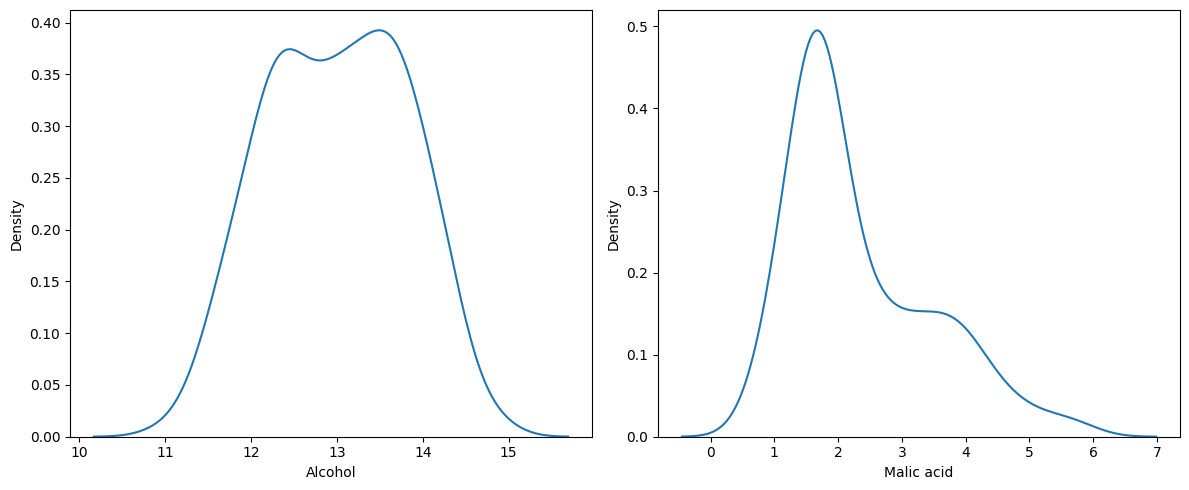

In [49]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

sns.kdeplot(df["Alcohol"], ax=ax1)
sns.kdeplot(df["Malic acid"])

plt.tight_layout()
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

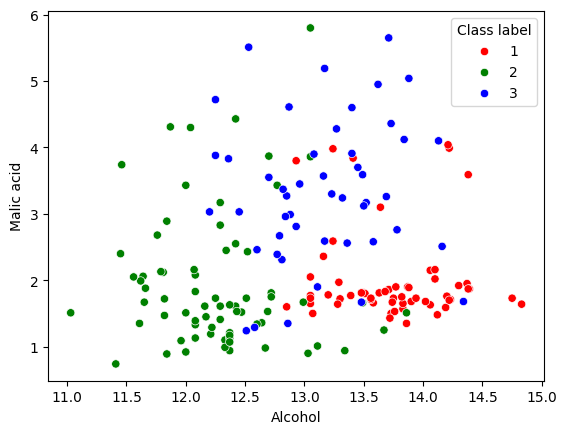

In [50]:
color_dict = {1: "red", 2: "green", 3: "blue"}

sns.scatterplot(
    data=df,
    x="Alcohol",
    y="Malic acid",
    hue="Class label",
    palette=color_dict
)

In [51]:
## train-test split

In [52]:
X = df[["Alcohol", "Malic acid"]]
y = df["Class label"]

from sklearn.model_selection import train_test_split

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 2)
(54, 2)
(124,)
(54,)


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled.min()

0.0

In [57]:
X_train_scaled.max()

1.0

In [58]:
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

In [59]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.3
std,0.8,1.1
min,11.0,0.7
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.0
max,14.8,5.8


In [60]:
np.round(X_train_scaled.describe(), 2)

,Alcohol,Malic acid
count,124.00,124.00
mean,0.51,0.31
std,0.21,0.21
min,0.00,0.00
25%,0.35,0.17
50%,0.51,0.21
75%,0.67,0.45
max,1.00,1.00


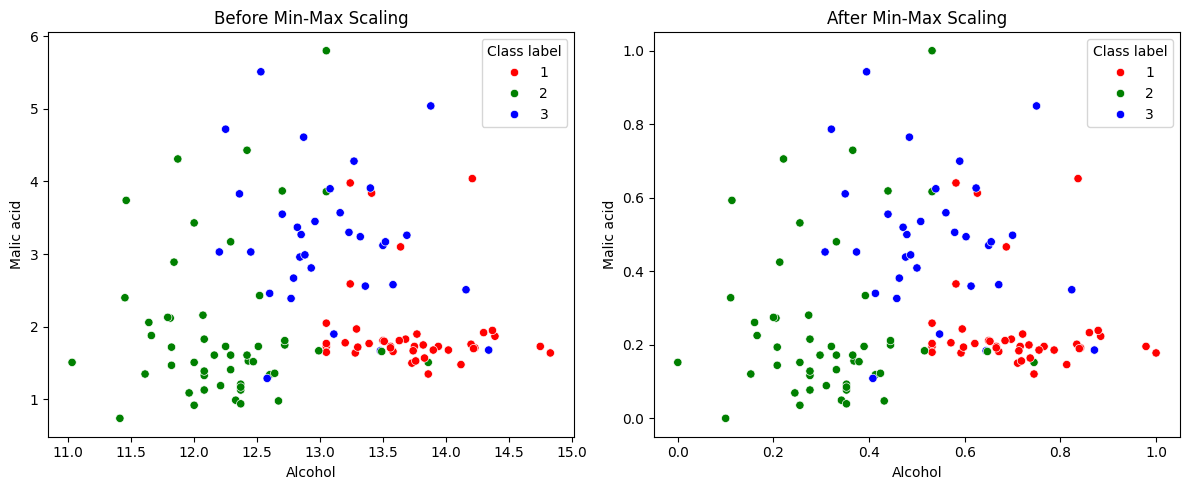

In [61]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,5)) 

sns.scatterplot(
    x=X_train["Alcohol"],
    y=X_train["Malic acid"],
    hue=y_train,
    palette = {1:"red",2:"green",3:"blue"},
    ax=ax1
)
ax1.set_title("Before Min-Max Scaling")

sns.scatterplot(
    x=X_train_scaled["Alcohol"],
    y=X_train_scaled["Malic acid"],
    hue=y_train,
    palette = {1:"red",2:"green",3:"blue"},
    ax=ax2
)
ax2.set_title("After Min-Max Scaling")

plt.tight_layout()
plt.show()

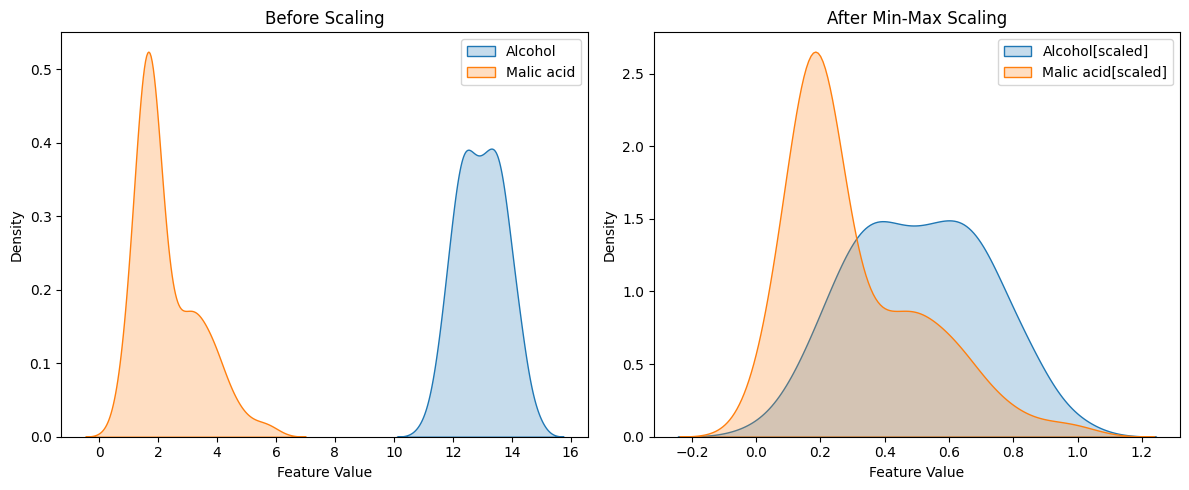

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#Before Scaling
sns.kdeplot(data=X_train,x="Alcohol",fill=True,label="Alcohol",ax=ax1)
sns.kdeplot(data=X_train,x="Malic acid",fill=True,label="Malic acid",ax=ax1)
ax1.set_title("Before Scaling")
ax1.set_xlabel("Feature Value")
ax1.legend()

# After Scaling 
sns.kdeplot(
    data=X_train_scaled,x="Alcohol", label="Alcohol[scaled]",fill=True,ax=ax2
)
sns.kdeplot(
    data=X_train_scaled,x="Malic acid",label="Malic acid[scaled]",fill=True,ax=ax2
)
ax2.set_title("After Min-Max Scaling")
ax2.set_xlabel("Feature Value")
ax2.legend()

plt.tight_layout()
plt.show()

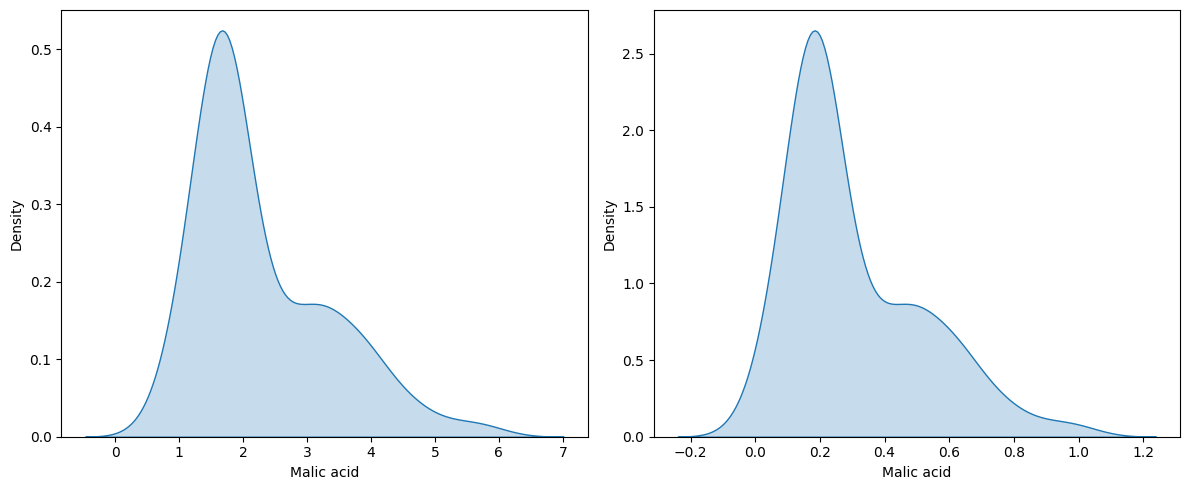

In [63]:
## malic acid distribution before and after scaling
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

sns.kdeplot(data=X_train,x="Malic acid",fill=True,ax=ax1)
sns.kdeplot(data=X_train_scaled,x="Malic acid",fill=True,ax=ax2)
plt.tight_layout()
plt.show()

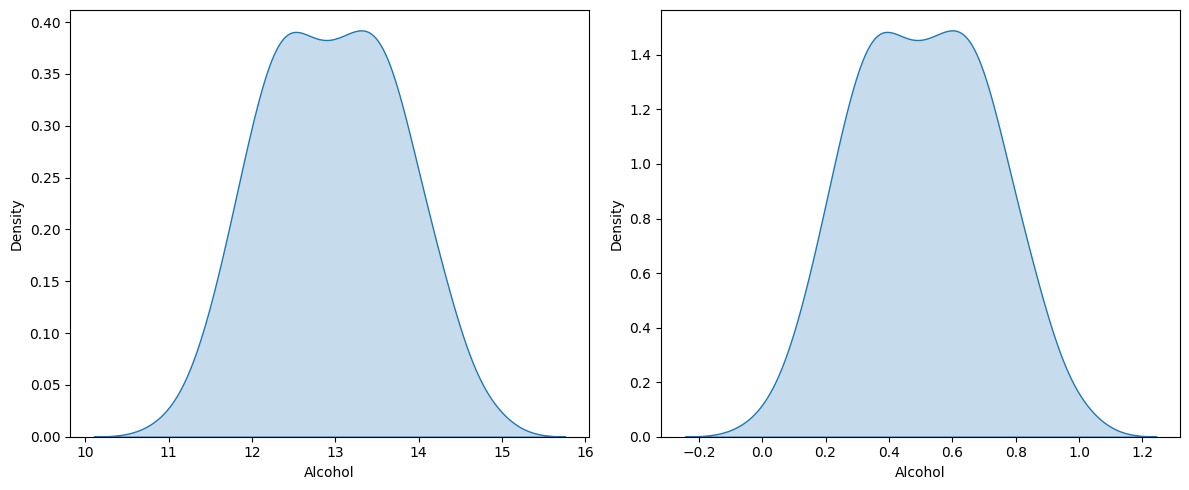

In [64]:
##Alocohol distribution before and after scaling
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

sns.kdeplot(data=X_train,x="Alcohol",fill=True,ax=ax1)
sns.kdeplot(data=X_train_scaled,x="Alcohol",fill=True,ax=ax2)
plt.tight_layout()
plt.show()

### Effect of Outliers in Min-Max Scaling

Min-Max scaling is **sensitive to outliers**.  
Extreme values stretch the feature range, causing most normal data points to be **squeezed near 0**.

### Impact
- Normal data becomes compressed
- Distance-based models lose sensitivity
- KDE plots may appear narrower or distorted

### Key Insight
Min-Max scaling is linear, but **outliers indirectly distort data distribution and visualization**.

### Recommendation
If outliers exist, prefer **StandardScaler** or **RobustScaler**.


## Mean Normalization

If you still want Mean Normalization (manual way) : 
```python                    
X_mean_norm = (X - X.mean()) / (X.max() - X.min())
```

Or with NumPy:
```pyhton
X_mean_norm = (X - np.mean(X, axis=0)) / (np.ptp(X, axis=0))
```

## MaxAbsScaling

```python
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)
```

###  Where MaxAbs Scaling is Used

MaxAbs Scaling is mainly used for **sparse and high-dimensional data**, where preserving zero values is important.

### Common Use Cases
- Text data representations (Bag-of-Words, TF-IDF)
- NLP pipelines with linear models
- High-dimensional sparse feature matrices
- Data containing both positive and negative values

### Why Use MaxAbs Scaling
- Preserves sparsity (zeros remain zero)
- Scales features to the range [-1, 1]
- Does not shift the data (no mean centering)
- Computationally efficient

### When Not to Use
- Datasets with strong outliers
- Dense numerical data requiring centering
- Neural networks (StandardScaler preferred)

### Key Takeaway
MaxAbs Scaling is ideal when maintaining sparsity and zero values is critical for model performance.


## Robust Scaling 

x_scaled = (x − median) / IQR

IQR = Q3 − Q1

When to use Robust Scaling: 

1) Datasets with strong outliers
2) Real-world numeric data (income, prices, sensor spikes)
3) Distance- or gradient-based models affected by outliers

```python 
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
```

| Scaler           | Centers          | Handles Outliers |
| ---------------- | ---------------- | ---------------- |
| MinMaxScaler     | No               | No               |
| StandardScaler   | Yes (mean)       | No               |
| MaxAbsScaler     | No               | No               |
| **RobustScaler** | **Yes (median)** | **Yes**          |


# Normalization vs Standardization

## General Tips

### 1) Is feature scaling required?
if yes !

### most of the problem solved using Standardization

but Normalization : we use MinMaxScaler most of the time (but if you know about the quantity)
for example in CNN [image processing ]

####  Min-Max scaling is used in image processing for CNNs, but with a specific understanding.

| Aspect           | Normalization | Standardization |
| ---------------- | ------------- | --------------- |
| Range            | Fixed (0–1)   | Unbounded       |
| Centered at 0    | No            | Yes             |
| Handles outliers | No            | Better          |
| Preserves shape  | Yes           | Yes             |
| Common scaler    | MinMaxScaler  | StandardScaler  |
